Hi there,

As per voicemail, please find the 3 datasets attached from Sprocket Central Pty Ltd:

Customer Demographic 

Customer Addresses

Transaction

data in the past three months
Can you please review the data quality to ensure that it is ready for our analysis in phase two. Remember to take note of any assumptions or issues we need to go back to the client on. As well as recommendations going forward to mitigate current data quality concerns.

I’ve also attached a data quality framework as a guideline. Let me know if you have any questions.

Thanks for your help.


##Resources to help you with the task
Data Quality Framework Table :

Below is a list of the Data Quality dimensions our team may use to evaluate a dataset. Some of these terms are common to the whole industry, so you may find more information and clarity on these terms by searching online.

<img src='https://drive.google.com/uc?id=1xmW_inBZBACyQbVgRipCqc-OPHWH3a6v'>





In [ ]:
# Importing required libraries
import pandas as pd
import io

In [2]:
from google.colab import files
uploaded = files.upload()

Saving KPMG_VI_New_raw_data_update_final.xlsx to KPMG_VI_New_raw_data_update_final (1).xlsx


In [3]:
# Importing required xlsx file
xlsx = pd.ExcelFile(io.BytesIO(uploaded['KPMG_VI_New_raw_data_update_final.xlsx']))

In [4]:
trans = pd.read_excel(xlsx,'Transactions',header=1)
newcustomer = pd.read_excel(xlsx,'NewCustomerList',header=1)
demographic = pd.read_excel(xlsx,'CustomerDemographic',header=1)
address = pd.read_excel(xlsx,'CustomerAddress',header=1)

# First we look into transactions.xlsx data


In [5]:
type(trans)

pandas.core.frame.DataFrame

In [6]:
trans.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [7]:
trans.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [8]:
trans['online_order'].value_counts()

1.0    9829
0.0    9811
Name: online_order, dtype: int64

In [9]:
trans['online_order']=trans['online_order'].fillna(method='ffill')

In [10]:
trans['brand'].value_counts()

Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: brand, dtype: int64

In [11]:
trans['brand']=trans['brand'].fillna(method='ffill')

In [12]:
trans['product_line'].value_counts()

Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: product_line, dtype: int64

In [13]:
trans['product_line']=trans['product_line'].fillna(method='bfill')

In [14]:
trans['product_class'].value_counts()

medium    13826
high       3013
low        2964
Name: product_class, dtype: int64

In [15]:
trans['product_class']=trans['product_class'].fillna(method='bfill')

In [16]:
trans['product_size'].value_counts()

medium    12990
large      3976
small      2837
Name: product_size, dtype: int64

In [17]:
trans['product_size']=trans['product_size'].fillna(method='ffill')

In [18]:
trans['standard_cost'].mean()

556.0469512209421

In [19]:
trans['standard_cost']=trans['standard_cost'].fillna(trans['standard_cost'].mean())

In [20]:
trans['product_first_sold_date']=trans['product_first_sold_date'].fillna(trans['product_first_sold_date'].mean())

In [21]:
submission = pd.DataFrame({
        "transaction_id": trans["transaction_id"],
        "product_id": trans["product_id"],
        "customer_id": trans["customer_id"],
        "transaction_date": trans["transaction_date"],
        "online_order": trans["online_order"],
        "order_status": trans["order_status"],
        "brand": trans["brand"],
        "product_line": trans["product_line"],
        "product_class": trans["product_class"],
        "product_size": trans["product_size"],
        "list_price": trans["list_price"],
        "standard_cost": trans["standard_cost"],
        "product_first_sold_date": trans["product_first_sold_date"]
    })
submission.to_csv('./after_cleaning_transaction.csv', index=False)
files.download('./after_cleaning_transaction.csv')
print(submission.head(10))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

   transaction_id  product_id  ...  standard_cost product_first_sold_date
0               1           2  ...          53.62                 41245.0
1               2           3  ...         388.92                 41701.0
2               3          37  ...         248.82                 36361.0
3               4          88  ...         381.10                 36145.0
4               5          78  ...         709.48                 42226.0
5               6          25  ...         829.65                 39031.0
6               7          22  ...          45.26                 34165.0
7               8          15  ...          13.44                 39915.0
8               9          67  ...         380.74                 33455.0
9              10          12  ...         161.60                 38216.0

[10 rows x 13 columns]


# Second dataframe Newcustomerlist.xlsx


In [22]:
newcustomer.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,0.77,0.9625,1.203125,1.022656,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,0.61,0.6100,0.762500,0.648125,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,0.85,0.8500,0.850000,0.850000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,0.90,1.1250,1.125000,1.125000,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,0.46,0.4600,0.575000,0.575000,4,4,1.703125


In [23]:
newcustomer.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Unnamed: 16                              0
Unnamed: 17                              0
Unnamed: 18                              0
Unnamed: 19                              0
Unnamed: 20                              0
Rank                                     0
Value                                    0
dtype: int6

In [24]:
newcustomer['last_name']=newcustomer['last_name'].fillna(method='ffill')

In [25]:
newcustomer['DOB']=newcustomer['DOB'].fillna(method='ffill')

In [26]:
newcustomer['job_title'].value_counts()

Associate Professor          15
Software Consultant          14
Environmental Tech           14
Chief Design Engineer        13
Cost Accountant              12
                             ..
Media Manager I               1
Web Developer I               1
Database Administrator IV     1
Systems Administrator IV      1
Administrative Officer        1
Name: job_title, Length: 184, dtype: int64

In [27]:
newcustomer['job_title']=newcustomer['job_title'].fillna(method='bfill')

In [28]:
newcustomer['job_industry_category'].value_counts()

Financial Services    203
Manufacturing         199
Health                152
Retail                 78
Property               64
IT                     51
Entertainment          37
Argiculture            26
Telecommunications     25
Name: job_industry_category, dtype: int64

In [29]:
newcustomer['job_industry_category'] = newcustomer['job_industry_category'].fillna(method='bfill')

In [30]:
newcustomer.head(1)

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,0.77,0.9625,1.203125,1.022656,1,1,1.71875


In [31]:
submission = pd.DataFrame({
        "first_name": newcustomer["first_name"],
        "last_name": newcustomer["last_name"],
        "gender": newcustomer["gender"],
        "past_3_years_bike_related_purchases": newcustomer["past_3_years_bike_related_purchases"],
        "DOB": newcustomer["DOB"],
        "job_title": newcustomer["job_title"],
        "job_industry_category": newcustomer["job_industry_category"],
        "wealth_segment": newcustomer["wealth_segment"],
        "deceased_indicator": newcustomer["deceased_indicator"],
        "owns_car": newcustomer["owns_car"],
        "tenure": newcustomer["tenure"],
        "address": newcustomer["address"],
        "postcode": newcustomer["postcode"],
        "state": newcustomer["state"],
        "country": newcustomer["country"],
        "property_valuation": newcustomer["property_valuation"],
        "Rank": newcustomer["Rank"],
        "Value": newcustomer["Value"]
    })
submission.to_csv('./after_cleaning_newcustlist.csv', index=False)
files.download('./after_cleaning_newcustlist.csv')
print(submission.head(10))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  first_name  last_name  gender  ...  property_valuation Rank     Value
0    Chickie    Brister    Male  ...                   6    1  1.718750
1      Morly     Genery    Male  ...                  11    1  1.718750
2    Ardelis  Forrester  Female  ...                   5    1  1.718750
3     Lucine      Stutt  Female  ...                   1    4  1.703125
4    Melinda     Hadlee  Female  ...                   9    4  1.703125
5      Druci    Brandli  Female  ...                   7    6  1.671875
6   Rutledge      Hallt    Male  ...                   7    6  1.671875
7     Nancie       Vian  Female  ...                   5    8  1.656250
8       Duff  Karlowicz    Male  ...                  10    8  1.656250
9    Barthel     Docket    Male  ...                   5   10  1.640625

[10 rows x 18 columns]


# Third DataFreame CustomerDemoGraphic.xlsx

In [32]:
demographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,NaN,No,20.0
1,66,Anselm,Gawne,Male,46,2002-03-11,Account Executive,Argiculture,High Net Worth,N,ï½ï½¨(Â´âï½â©,No,1.0
2,1888,Sibyl,Scholtz,Female,67,2002-01-26,Food Chemist,Health,Mass Customer,N,NaN,Yes,1.0
3,3435,Stevena,Allcock,Female,80,2002-01-15,Senior Editor,NaN,Affluent Customer,N,ÅâÂ´â°ËÃÂ¨ËÃâââ,No,1.0
4,2858,Benedicto,Radki,Male,4,2002-01-09,Recruiting Manager,NaN,Mass Customer,N,testâ testâ«,Yes,1.0


In [33]:
demographic.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [34]:
demographic['last_name']=demographic['last_name'].fillna(method='ffill')

In [35]:
demographic['DOB']=demographic['DOB'].fillna(method='ffill')

In [36]:
demographic['job_title'].value_counts()

Business Systems Development Analyst    45
Tax Accountant                          44
Social Worker                           44
Internal Auditor                        42
Recruiting Manager                      41
                                        ..
Administrative Assistant II              4
Research Assistant III                   3
Health Coach III                         3
Health Coach I                           3
Developer I                              1
Name: job_title, Length: 195, dtype: int64

In [37]:
demographic['job_title']=demographic['job_title'].fillna(method='bfill')

In [38]:
demographic['job_industry_category'].value_counts()

Manufacturing         799
Financial Services    774
Health                602
Retail                358
Property              267
IT                    223
Entertainment         136
Argiculture           113
Telecommunications     72
Name: job_industry_category, dtype: int64

In [39]:
demographic['job_industry_category']=demographic['job_industry_category'].fillna(method='ffill')

In [40]:
del demographic['default']

In [41]:
demographic['tenure'].mean()


10.65704063378482

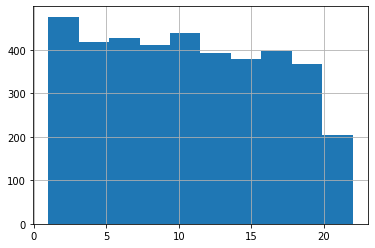

In [42]:
demographic['tenure'].hist()

In [43]:
demographic['tenure']=demographic['tenure'].fillna(demographic['tenure'].mean())

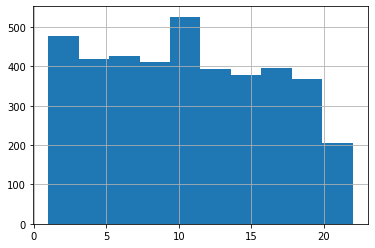

In [44]:
demographic['tenure'].hist()

In [45]:
demographic.head(1)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,No,20.0


In [47]:
submission = pd.DataFrame({
        "customer_id": demographic["customer_id"],
        "first_name": demographic["first_name"],
        "last_name": demographic["last_name"],
        "gender": demographic["gender"],
        "past_3_years_bike_related_purchases": demographic["past_3_years_bike_related_purchases"],
        "DOB": demographic["DOB"],
        "job_title": demographic["job_title"],
        "job_industry_category": demographic["job_industry_category"],
        "wealth_segment": demographic["wealth_segment"],
        "deceased_indicator": demographic["deceased_indicator"],
        "owns_car": demographic["owns_car"],
        "tenure": demographic["tenure"]
    })
submission.to_csv('./after_cleaning_Customerdemographic.csv', index=False)
files.download('./after_cleaning_Customerdemographic.csv')
print(submission.head(10))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

   customer_id first_name    last_name  ... deceased_indicator  owns_car tenure
0           34   Jephthah     Bachmann  ...                  N        No   20.0
1           66     Anselm        Gawne  ...                  N        No    1.0
2         1888      Sibyl      Scholtz  ...                  N       Yes    1.0
3         3435    Stevena      Allcock  ...                  N        No    1.0
4         2858  Benedicto        Radki  ...                  N       Yes    1.0
5          422       Vito       Norker  ...                  N        No    1.0
6         2296   Nathalia       Sanger  ...                  N        No    1.0
7          470     Darbee    Klimowicz  ...                  N        No    1.0
8         3949      Costa  Sleightholm  ...                  N       Yes    1.0
9         1402    Hillier      Andraud  ...                  N        No    1.0

[10 rows x 12 columns]


# Fourth Address.xlsx

In [48]:
address.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [49]:
address.isnull().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

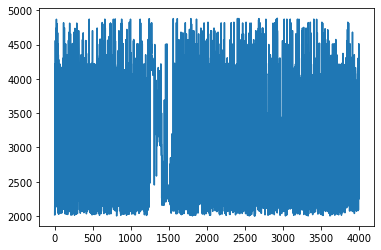

In [50]:
address['postcode'].plot()

In [51]:
address['country'].value_counts()

Australia    3999
Name: country, dtype: int64

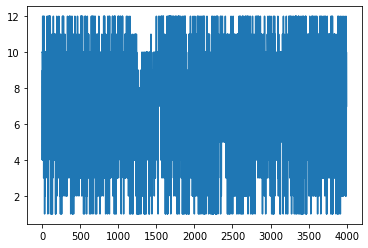

In [52]:
address['property_valuation'].plot()

In [53]:
submission = pd.DataFrame({
        "customer_id": address["customer_id"],
        "address": address["address"],
        "postcode": address["postcode"],
        "state": address["state"],
        "country": address["country"],
        "property_valuation": address["property_valuation"]
    })
submission.to_csv('./after_cleaning_address.csv', index=False)
files.download('./after_cleaning_address.csv')
print(submission.head(10))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

   customer_id                  address  ...    country property_valuation
0            1       060 Morning Avenue  ...  Australia                 10
1            2      6 Meadow Vale Court  ...  Australia                 10
2            4       0 Holy Cross Court  ...  Australia                  9
3            5      17979 Del Mar Point  ...  Australia                  4
4            6         9 Oakridge Court  ...  Australia                  9
5            7         4 Delaware Trail  ...  Australia                  9
6            8      49 Londonderry Lane  ...  Australia                  4
7            9          97736 7th Trail  ...  Australia                 12
8           11     93405 Ludington Park  ...  Australia                  8
9           12  44339 Golden Leaf Alley  ...  Australia                  4

[10 rows x 6 columns]
